# Final Project By Eli Weiss

This project will look through Online Marketing Data from IPGMB. The purpose of this study will be to find the most cost effective segments to target, provide the number of advertisments to send to members of these segments, and will then seek the optimal time to target them by identifiying high spend time period (holidays).

In [4]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/enwweiss/DAV-5400/master/IPGDS.csv')
data.head()

,day,user_id,channel,segmentType,cost,click,pageView
0,4/21/2019,35025,Display,Demographic,0.0010,0,0
1,4/21/2019,35033,Mobile,Geo-Location,0.0015,0,0
2,4/21/2019,35039,Display,Demographic,0.0005,0,0
3,4/21/2019,35053,Native,Channel_Native,0.0014,1,4
4,4/21/2019,35057,Mobile,Geo-Location,0.0015,0,0


# Part I: Which segment should we target?

To begin we are going to break the dataset into subsets by the Segments, and eventually <br/> by the channel they are reached through

In [5]:
#Subseting the Data

Seg_G=data[data.segmentType == 'Geo-Location']
Seg_R=data[data.segmentType == 'Retargetting']
Seg_D=data[data.segmentType == 'Demographic']
Seg_B=data[data.segmentType == 'Behavioral']

Now that we have the subsets of the Segments we can calculate some overall Industry metrics such as the Click Through Rate (you can think of this as the pecentage of clicks in a population of impressions served), Cost per Impression, and the Cost per Click

First let's calculate the denominator:

In [7]:
# Count of Impressions by Segment

Impressions_G= len(Seg_G.day)
Impressions_R= len(Seg_R.day)
Impressions_D= len(Seg_D.day)
Impressions_B= len(Seg_B.day)

Now we can calulate the CTR

In [8]:
# Calculate the Overall Click through rate by segment

CTR_G_Overall =sum(Seg_G.click)/Impressions_G
CTR_R_Overall =sum(Seg_R.click)/Impressions_R
CTR_D_Overall =sum(Seg_D.click)/Impressions_D
CTR_B_Overall =sum(Seg_B.click)/Impressions_B

CTR_Overall = np.array([CTR_G_Overall,CTR_R_Overall,CTR_D_Overall,CTR_B_Overall])
CTR_Overall

array([ 0.06021046,  0.06281407,  0.04224165,  0.03329378])

We see that Segments Geo-Location and Retargetting have hight CTRs

Now, let's calcuate the CPC

In [9]:
# Cost per click by segment

CPC_G_Overall =sum(Seg_G.cost)/sum(Seg_G.click)
CPC_R_Overall =sum(Seg_R.cost)/sum(Seg_R.click)
CPC_D_Overall =sum(Seg_D.cost)/sum(Seg_D.click)
CPC_B_Overall =sum(Seg_B.cost)/sum(Seg_B.click)

CPC_Overall = np.array([CPC_G_Overall,CPC_R_Overall,CPC_D_Overall,CPC_B_Overall])
CPC_Overall

array([ 0.03593453,  0.015124  ,  0.03082589,  0.0610218 ])

We see that both Geo-Location Retargetting have low CPCs

Let's calculate the Cost Per Impression

In [10]:
# Cost per Impression by segment

CPI_G_Overall =sum(Seg_G.cost)/Impressions_G
CPI_R_Overall =sum(Seg_R.cost)/Impressions_R
CPI_D_Overall =sum(Seg_D.cost)/Impressions_D
CPI_B_Overall =sum(Seg_B.cost)/Impressions_B

CPI_Overall = np.array([CPI_G_Overall,CPI_R_Overall,CPI_D_Overall,CPI_B_Overall])
CPI_Overall

array([ 0.00216363,  0.00095   ,  0.00130214,  0.00203165])

We see that both Geo-Location Retargetting have low CPIs as well

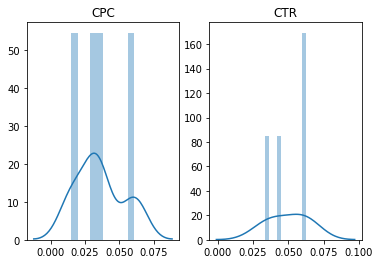

In [11]:
#Create Bar charts to show the insights 

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(1)
plt.subplot(121)
sns.distplot(CPC_Overall,bins =10)
plt.title('CPC')
plt.xlabel('')
plt.subplot(122)
sns.distplot(CTR_Overall, bins = 10)
plt.title('CTR')
plt.show()

We see that the lowest CPCs are just as Frequent as high CPCs, this indicates that we should be taking advantage of Segements that are cheaper to capture. 

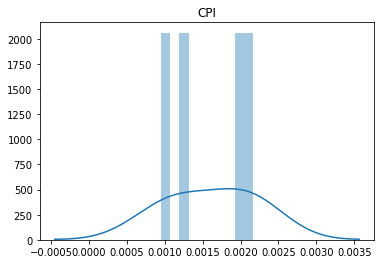

In [12]:
sns.distplot(CPI_Overall,bins =10)
plt.title('CPI')
plt.show()

We see that the lowest CPIs are just as Frequent as high CPIs, this indicates that we should be taking advantage of Segements that are cheaper to capture. 

## Part II: How should we target them?

Now that we have identified Retargetting and Geo-Location as segments that are worth targeting<br/>
Let's explore the most effective way to target these segments.

Let's find out if there is a relationship between the number of ads we serve<br/> to a user and if they will interact with the ad.<br/>
We wil start by finding the average number of impressions sent to users who clicked on an ad

In [13]:
# Subset the data for User level insights

Impression_Per_User = data.groupby('user_id')['user_id'].count()
Clicked=data.groupby('user_id')['click'].max()

In [14]:
# Avg Num of Impression Per User who clicked

round(pd.DataFrame.mean(Impression_Per_User[Impression_Per_User>0]/Clicked[Clicked>0]),3)

2.405

We see that the average number of impressions served to a user who clicks is 2.4

Let's see what the  average number of impressions sent to users who didn't click on an ad

In [17]:
round(pd.DataFrame.mean(Impression_Per_User[Clicked==0]),3)

1.763

We see that the average number of ads served to users who didn't click is much lower.

Let's prove, using a Logistic Regression, that there is a statistical relationship between the number of ads served and if that user will click on the advertisment.

In [18]:
#Do a Logistic Regression

#Import Logistic Regression
import numpy as np
from sklearn.linear_model import LogisticRegression

In [23]:
#x = pd.DataFrame(Impression_Per_User).reset_index(drop =True)
#y = pd.DataFrame(Clicked).reset_index(drop =True)

x = np.array(Impression_Per_User).reshape(-1, 1)
y = np.array(Clicked).reshape(-1, 1)

In [109]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split


X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [110]:
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [111]:
y_pred=logreg.predict(X_test)

In [115]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.707928549044


We see that the Logistic Regression was able to predict with ~70% accuracy showing there is a strong relationship between these two variables. 

Now that we have seen that there is a statistical relationship between the training and test set we used let's Cross Validate the Logistic regression to see if the prediction rate will remain steady if we use different subsets of the data for testing and training. 

In [113]:
#Cross validate the results

from sklearn.linear_model import LogisticRegressionCV


log_CV = LogisticRegressionCV(cv=10, random_state=0).fit(x, y)
log_CV.predict(x)
log_CV.predict_proba(x).shape
log_CV.score(x, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.70661861203063481

We see that the prediction rate is stable after cross validation and we can be sure that there is a statistical relationship between the X and Y variables

# Part III: When Should we target them?

In [24]:
#use API to identify the date for a holiday
#This is in JSON Format
# import json
import json

#Import the necessary library
import requests

#now I save the url to use plus my key.
url = 'https://calendarific.com/api/v2/holidays?api_key=242918dd972486ee4a5cbda1e0ae7d2a174e101c&country=US&year=2019'

#now I connect to the url
resp = requests.get(url)
resp

<Response [200]>

In [38]:
# now convert the 'resp' object's JSON content into a list of 
# native Python objects
data = resp.json()
data

{'meta': {'code': 200},
 'response': {'holidays': [{'date': {'datetime': {'day': 1,
      'month': 1,
      'year': 2019},
     'iso': '2019-01-01'},
    'description': "New Year's Day is the first day of the Gregorian calendar, which is widely used in many countries such as the USA.",
    'locations': 'All',
    'name': "New Year's Day",
    'states': 'All',
    'type': ['National holiday']},
   {'date': {'datetime': {'day': 4, 'month': 1, 'year': 2019},
     'iso': '2019-01-04'},
    'description': 'World Braille Day celebrates the life and achievements of Louis Braille, who invented the braille code for the visually impaired.',
    'locations': 'All',
    'name': 'World Braille Day',
    'states': 'All',
    'type': ['Worldwide observance']},
   {'date': {'datetime': {'day': 6, 'month': 1, 'year': 2019},
     'iso': '2019-01-06'},
    'description': 'Many people in the United States annually observe Epiphany, or Three Kings’ Day, on January 6. It is a Christian observance and a publ

In [42]:
holidays=[]

for x in range(len(data['response']['holidays'])):
    holidays.append({'date':data['response']['holidays'][x]['date']['datetime']['day'], 'month':data['response']['holidays'][x]['date']['datetime']['month'],'name':data['response']['holidays'][x]['name']})
    
holidays

[{'date': 1, 'month': 1, 'name': "New Year's Day"},
 {'date': 4, 'month': 1, 'name': 'World Braille Day'},
 {'date': 6, 'month': 1, 'name': 'Epiphany'},
 {'date': 7, 'month': 1, 'name': 'Orthodox Christmas Day'},
 {'date': 7, 'month': 1, 'name': "International Programmers' Day"},
 {'date': 13, 'month': 1, 'name': 'Stephen Foster Memorial Day'},
 {'date': 14, 'month': 1, 'name': 'Orthodox New Year'},
 {'date': 18, 'month': 1, 'name': 'Lee-Jackson Day'},
 {'date': 19, 'month': 1, 'name': "Robert E. Lee's Birthday"},
 {'date': 19, 'month': 1, 'name': "Confederate Heroes' Day"},
 {'date': 20, 'month': 1, 'name': 'World Religion Day'},
 {'date': 21, 'month': 1, 'name': "Tu Bishvat/Tu B'Shevat"},
 {'date': 21, 'month': 1, 'name': 'Martin Luther King Jr. Day'},
 {'date': 21, 'month': 1, 'name': "Robert E. Lee's Birthday"},
 {'date': 21, 'month': 1, 'name': "Robert E. Lee's Birthday"},
 {'date': 21, 'month': 1, 'name': "Robert E. Lee's Birthday"},
 {'date': 21, 'month': 1, 'name': 'Idaho Human

In [44]:
# Move the dict into  a data frame

holidays_df = pd.DataFrame(holidays,columns=['date', 'month','name'])
#Rename the headers
holidays_df.columns = ["Day", "Month","Name"]

holidays_df.head(10)

,Day,Month,Name
0,1,1,New Year's Day
1,4,1,World Braille Day
2,6,1,Epiphany
3,7,1,Orthodox Christmas Day
4,7,1,International Programmers' Day
5,13,1,Stephen Foster Memorial Day
6,14,1,Orthodox New Year
7,18,1,Lee-Jackson Day
8,19,1,Robert E. Lee's Birthday
9,19,1,Confederate Heroes' Day


In [46]:
holidays_df[holidays_df.Month==4]

,Day,Month,Name
95,1,4,April Fool's Day
96,1,4,César Chávez Day observed
97,2,4,World Autism Awareness Day
98,2,4,Pascua Florida Day
99,3,4,Isra and Mi'raj
100,4,4,United Nations' Mine Awareness Day
101,6,4,International Day of Sport for Development and...
102,6,4,National Tartan Day
103,7,4,United Nations' World Health Day
104,7,4,Day of Remembrance of the Victims of the Rwand...
